In [1]:
from blg_strain.classes import BandStructure
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import _M_bands, _M_integral, _M_integral_by_parts
from blg_strain.utils.const import *

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib notebook

In [3]:
bs_dict = dict()

Delta = 0.01
deltas = np.array([-0.05, -0.01, 0, 0.01, 0.05])

for delta in deltas:
    bs = BandStructure(delta=delta, Delta=Delta, ham='2x2')
    
    bs.calculate(1000,1000)
    
    bs_dict[str(delta)] = bs

In [33]:
bs.save('E:\\sBLG_data\\bs.npz')

In [35]:
bs = BandStructure.load('E:\\sBLG_data\\bs.npz')

# Bands

<IPython.core.display.Javascript object>


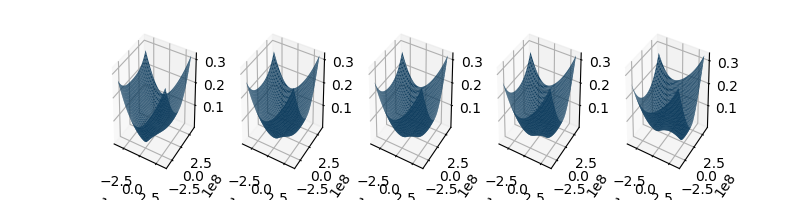

In [19]:
fig = plt.figure(figsize=(8, 2))
axes = []
axes.append(fig.add_subplot(151, projection='3d'))
axes.append(fig.add_subplot(152, projection='3d'))
axes.append(fig.add_subplot(153, projection='3d'))
axes.append(fig.add_subplot(154, projection='3d'))
axes.append(fig.add_subplot(155, projection='3d'))

for i, (k, bs) in enumerate(bs_dict.items()):
    axes[i].plot_surface(bs.Kx, bs.Ky, bs.E[1])

In [20]:
from blg_strain.utils.plotting import plot_bands_3d

<IPython.core.display.Javascript object>


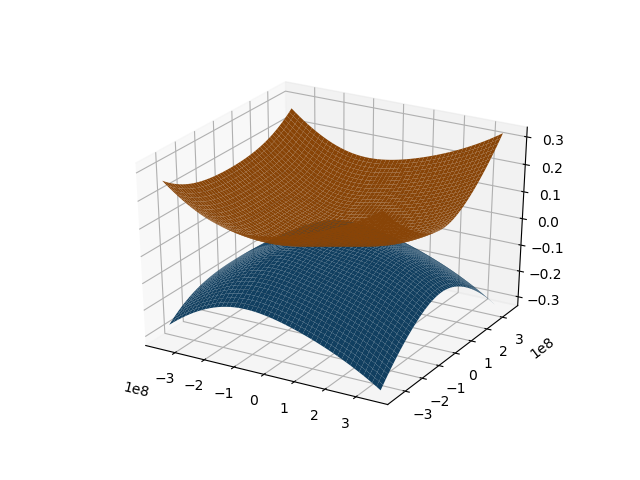

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x2d290253508>)

In [15]:
bs = bs_dict['0.0']
plot_bands_3d(bs.Kx, bs.Ky, bs.E, which=[0,1])

<IPython.core.display.Javascript object>


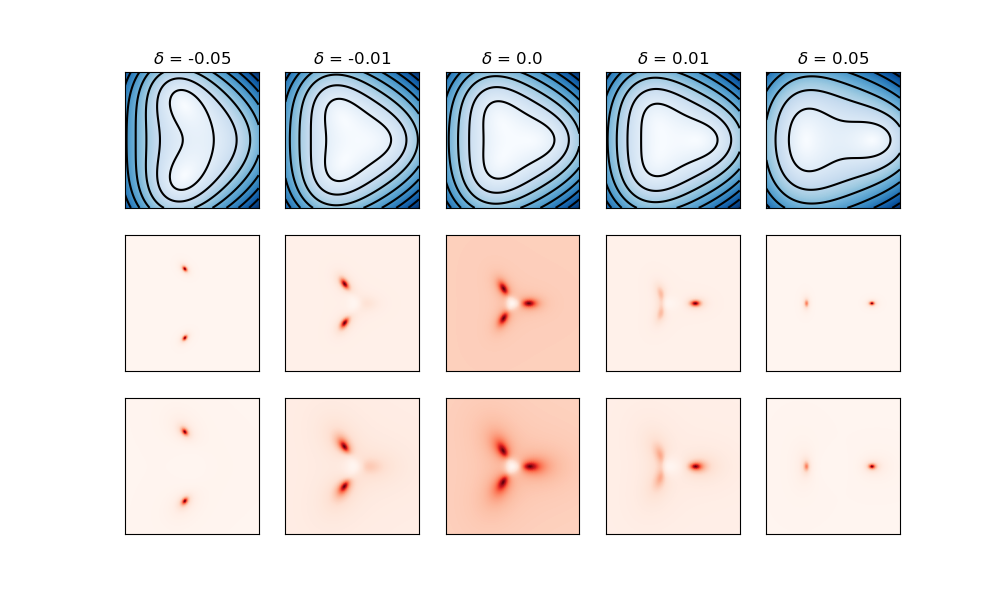

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))

for i, (k, bs) in enumerate(bs_dict.items()):
    ax[0,i].pcolormesh(bs.Kx, bs.Ky, bs.E[1], cmap='Blues')
    ax[0,i].contour(bs.Kx, bs.Ky, bs.E[1], colors='k')
    
    ax[1,i].pcolormesh(bs.Kx, bs.Ky, bs.Omega[1], cmap='Reds')
#     ax[1,i].contour(bs.Kx, bs.Ky, bs.Omega[1], colors='k')
    
    ax[2,i].pcolormesh(bs.Kx, bs.Ky, bs.Mu[1], cmap='Reds')
#     ax[2,i].contour(bs.Kx, bs.Ky, bs.Mu[1], colors='k')
    
    ax[0,i].set_title(r'$\delta$ = {}'.format(bs.kwargs['delta']))
    for j in range(3):
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])

# Calculating versus many parameters

For each $\delta$ and $\Delta$, band structure needs to be recalculated. For each $E_F$ and $T$, we calculate the Fermi function `feq_func(E, EF, T)` which does not require recalculation of the bands. Then given all of this, we can calculate the magnetization (not yet dotted with electric field) for a combination of $\delta$, $\Delta$, $E_F$ and $T$.

In [4]:
bs.get_feq(EF=0.006, T=0)

In [5]:
bs.get_M_over_E()

array([2.49309390e-02, 4.89314282e-17])

In [6]:
bs.get_M([100, 0])

2.493093902337748